In [ ]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('jpred4.tsv', sep='\t')
df

,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus
...,...,...,...,...,...,...,...,...
1343,e1n13.1B,1n13,d.155.1.2,Alpha and beta (a+b),112,archaea,2190,Methanocaldococcus jannaschii
1344,e1qd6.1C,1qd6,f.4.2.1,Membrane and cell surface proteins and peptides,240,bacteria,562,Escherichia coli
1345,e1qqp.12,1qqp,b.121.4.1,All beta,216,viruses,12110,Foot-and-mouth disease virus
1346,e1qtn.1A,1qtn,c.17.1.1,Alpha and beta (a/b),152,eukaryota,9606,Homo sapiens


# Distribution of domain lengths

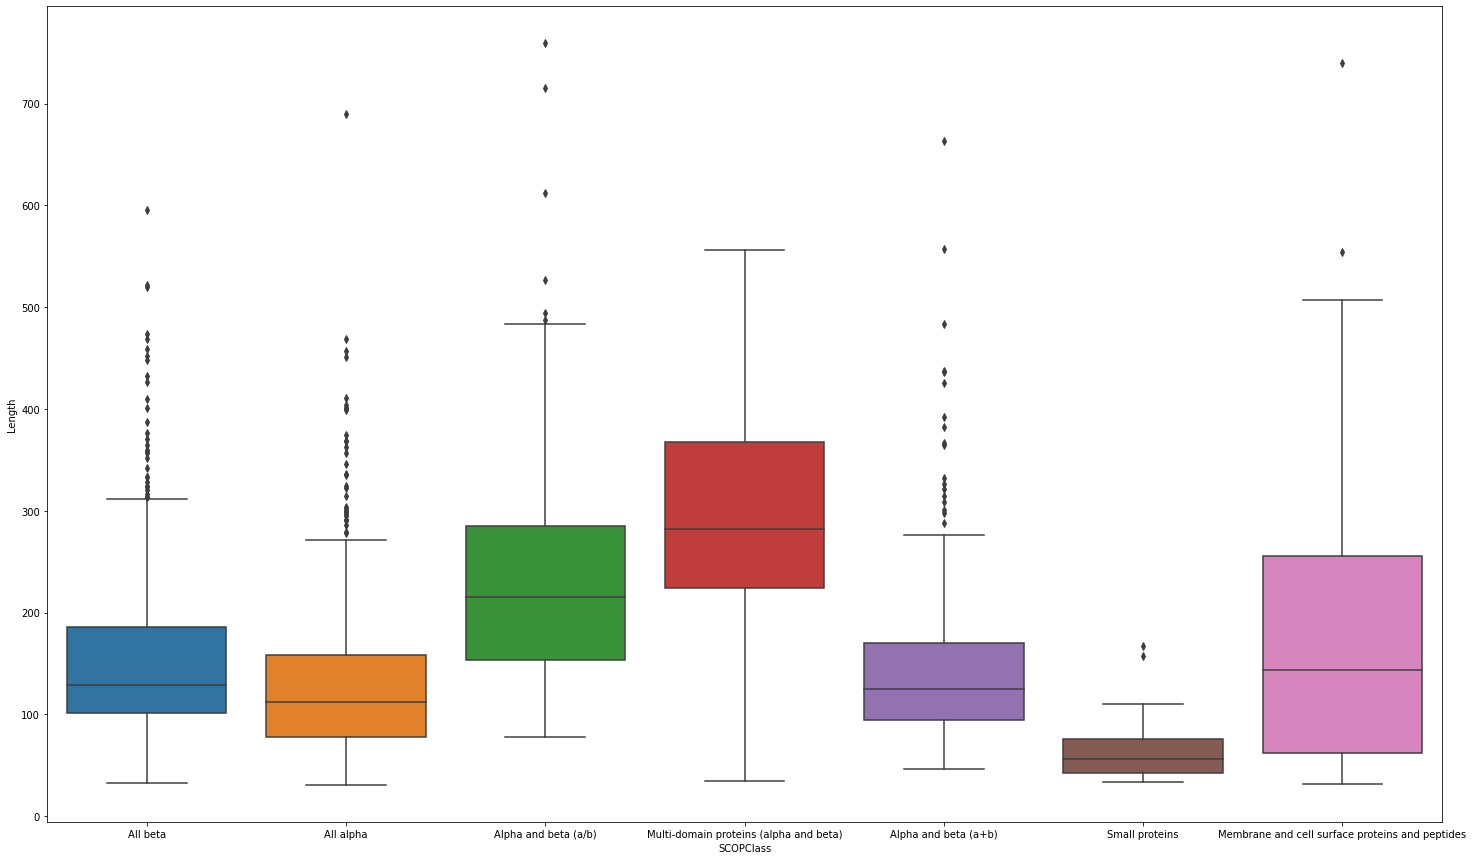

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(x = "SCOPClass",y="Length",data =df)

# Structural classification (SCOP)

In [ ]:
SCOP_count = df["SCOPClass"].value_counts()
df2 = SCOP_count.rename_axis("SCOPClass").to_frame("counts")
df2

,counts
SCOPClass,
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


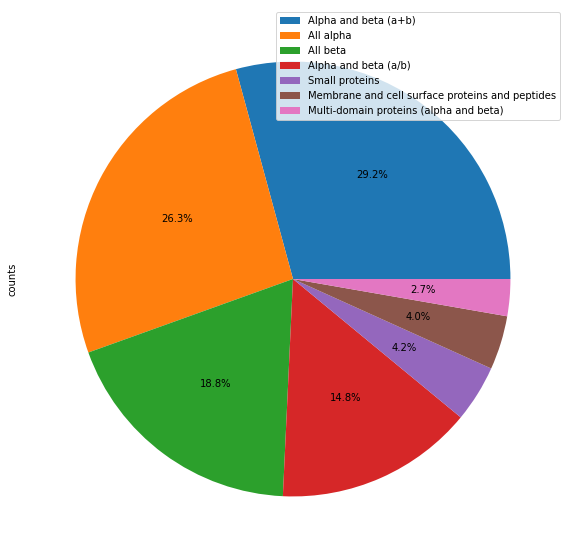

In [ ]:
df2.plot.pie(y="counts", autopct='%1.1f%%',figsize=(20,10), labels= None)

# Comparative aminoacid composition

1.1 Entire dataset

In [ ]:
length = 218421
dictio = {'A': 18387, 'C': 2908, 'E': 15539, 'D': 12678, 'G': 15818, 'F': 8585, 'I': 12434, 'H': 4897, 'K': 13105, 'M': 4690, 'L': 20473, 'N': 8775, 'Q': 8353, 'P': 9851, 'S': 12576, 'R': 11430, 'T': 11902, 'W': 2983, 'V': 15645, 'Y': 7389, 'X': 3}
df5 = pd.DataFrame.from_dict(dictio, orient = "index",columns=["TotalNumber"])
df5["Aminoacids"] = df5.index
df5

,TotalNumber,Aminoacids
A,18387,A
C,2908,C
E,15539,E
D,12678,D
G,15818,G
F,8585,F
I,12434,I
H,4897,H
K,13105,K
M,4690,M


In [ ]:
df5["TotalNumber"] = df5["TotalNumber"].div(length)
df5

,TotalNumber,Aminoacids
A,0.084181,A
C,0.013314,C
E,0.071142,E
D,0.058044,D
G,0.072420,G
F,0.039305,F
I,0.056927,I
H,0.022420,H
K,0.059999,K
M,0.021472,M


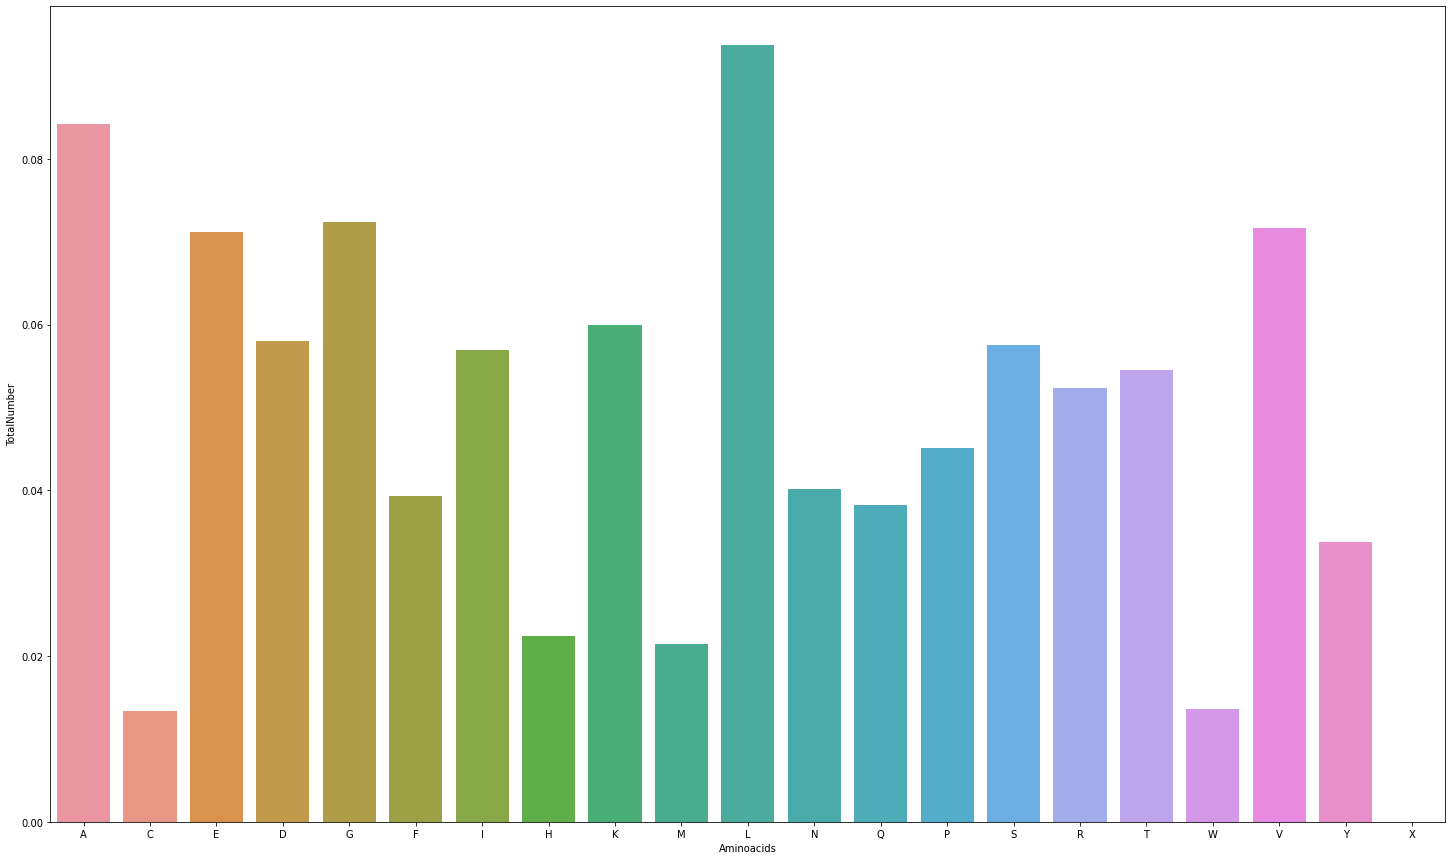

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x="Aminoacids", y= "TotalNumber", data=df5)

1.2 Fraction of helix, strand and coil residues

In [ ]:
m=[['V', 'E', 6494, 48588], ['D', 'H', 3592, 77742], ['L', '-', 6096, 92091], ['H', 'E', 1105, 48588], ['Q', 'H', 3838, 77742], ['L', 'E', 4841, 48588], ['R', 'E', 2406, 48588], ['K', '-', 5336, 92091], ['Y', 'E', 2410, 48588], ['I', 'H', 4821, 77742], ['T', 'H', 3271, 77742], ['W', 'H', 1086, 77742], ['P', '-', 7250, 92091], ['Y', '-', 2470, 92091], ['T', '-', 5405, 92091], ['V', 'H', 5112, 77742], ['M', 'H', 2073, 77742], ['K', 'E', 2437, 48588], ['Y', 'H', 2509, 77742], ['A', 'H', 9118, 77742], ['E', 'H', 7450, 77742], ['C', 'H', 811, 77742], ['F', '-', 2870, 92091], ['E', 'E', 2321, 48588], ['X', '-', 3, 92091], ['E', '-', 5768, 92091], ['P', 'E', 1092, 48588], ['S', 'H', 3458, 77742], ['A', 'E', 3131, 48588], ['N', 'E', 1262, 48588], ['I', '-', 2979, 92091], ['K', 'H', 5332, 77742], ['C', '-', 1275, 92091], ['N', '-', 5204, 92091], ['G', 'E', 2414, 48588], ['D', 'E', 1598, 48588], ['S', '-', 6680, 92091], ['Q', 'E', 1401, 48588], ['W', '-', 1009, 92091], ['D', '-', 7488, 92091], ['S', 'E', 2438, 48588], ['W', 'E', 888, 48588], ['T', 'E', 3226, 48588], ['R', '-', 4209, 92091], ['L', 'H', 9536, 77742], ['H', '-', 2276, 92091], ['F', 'H', 3066, 77742], ['R', 'H', 4815, 77742], ['P', 'H', 1509, 77742], ['M', '-', 1598, 92091], ['H', 'H', 1516, 77742], ['A', '-', 6138, 92091], ['F', 'E', 2649, 48588], ['M', 'E', 1019, 48588], ['N', 'H', 2309, 77742], ['V', '-', 4039, 92091], ['G', '-', 10884, 92091], ['G', 'H', 2520, 77742], ['I', 'E', 4634, 48588], ['C', 'E', 822, 48588], ['Q', '-', 3114, 92091]]
corr= pd.DataFrame(m)
corr.columns = ['Aminoacids','SecondaryS','Correspondances', "SS_Ab"]
corr

,Aminoacids,SecondaryS,Correspondances,SS_Ab
0,V,E,6494,48588
1,D,H,3592,77742
2,L,-,6096,92091
3,H,E,1105,48588
4,Q,H,3838,77742
...,...,...,...,...
56,G,-,10884,92091
57,G,H,2520,77742
58,I,E,4634,48588
59,C,E,822,48588


In [ ]:
corr["Correspondances"]=corr["Correspondances"].div(corr["SS_Ab"])
corr

,Aminoacids,SecondaryS,Correspondances,SS_Ab
0,V,E,0.133654,48588
1,D,H,0.046204,77742
2,L,-,0.066195,92091
3,H,E,0.022742,48588
4,Q,H,0.049368,77742
...,...,...,...,...
56,G,-,0.118187,92091
57,G,H,0.032415,77742
58,I,E,0.095373,48588
59,C,E,0.016918,48588


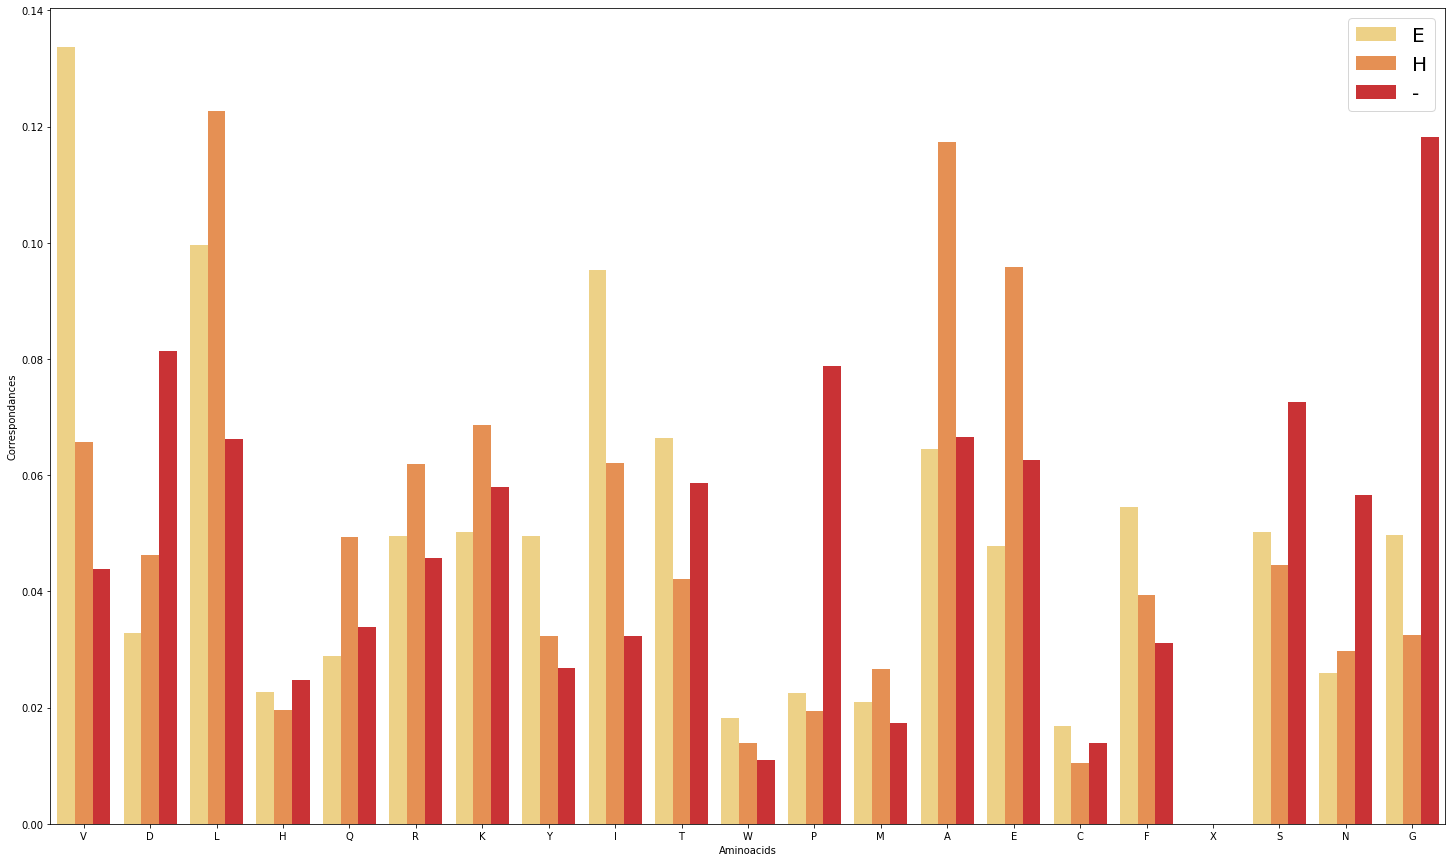

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x="Aminoacids",y="Correspondances",hue="SecondaryS",data=corr,palette="YlOrRd")
plt.legend(loc=1,prop={'size':20})

# Taxonomic classification

Superkingdom

In [ ]:
Super_count = df["Suprekingdom"].value_counts()
df3 = Super_count.rename_axis("Superkingdom").to_frame("counts")
df3

,counts
Superkingdom,
bacteria,689
eukaryota,488
archaea,108
viruses,62
other/synthetic,1


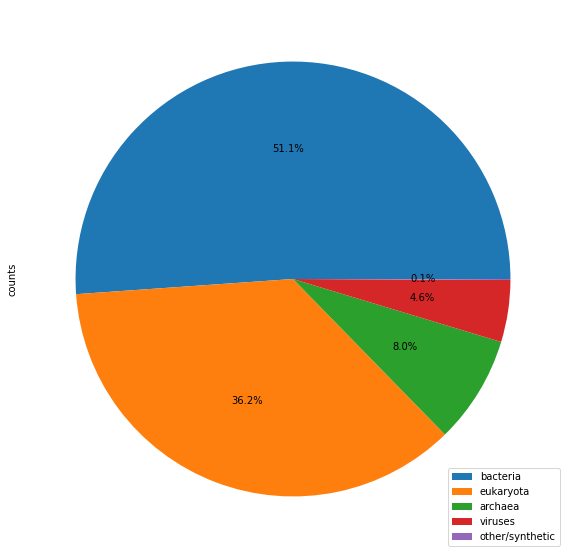

In [ ]:
df3.plot.pie(y="counts", autopct='%1.1f%%',figsize=(20,10), labels= None)

Species level (Top 5, Top 10, Top 20)

In [ ]:
Species_count = df["TaxaName"].value_counts()
df4 = Species_count.rename_axis("TaxaName").to_frame("counts")
df4

,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
...,...
Musca domestica,1
Thermococcus thioreducens,1
Bacteroides vulgatus ATCC 8482,1


In [ ]:
top5 = df4.nlargest(5, ['counts'])
top10 = df4.nlargest(10, ['counts'])
top20 = df4.nlargest(20, ['counts'])

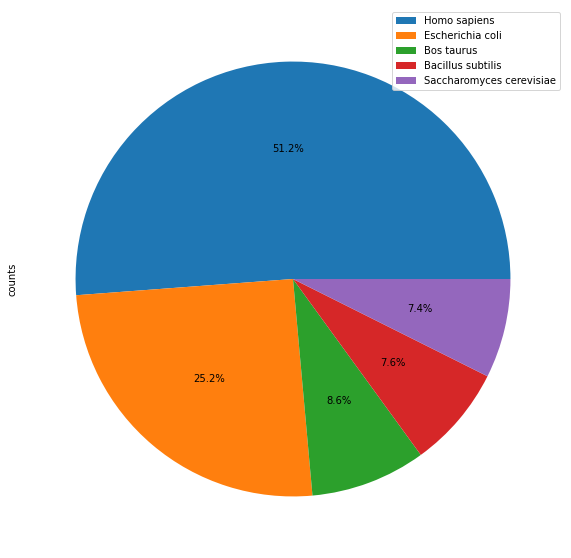

In [ ]:
top5.plot.pie(y="counts", autopct='%1.1f%%',figsize=(20,10), labels= None)

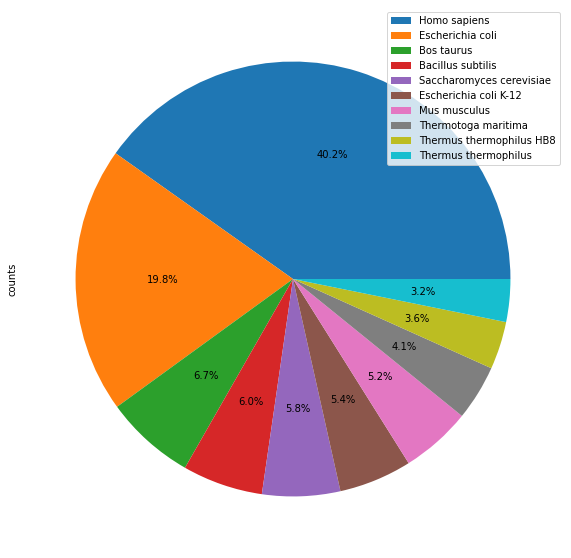

In [ ]:
top10.plot.pie(y="counts", autopct='%1.1f%%',figsize=(20,10), labels= None)

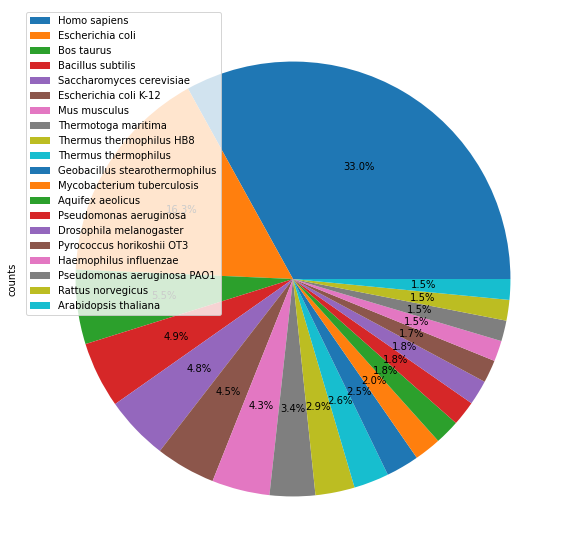

In [ ]:
top20.plot.pie(y="counts", autopct='%1.1f%%',figsize=(20,10), labels= None)

# Relative abundance of secondary structure conformations

In [ ]:
length = 218421
d2={'E': 48588, '-': 92091, 'H': 77742}
ss_comp= pd.DataFrame.from_dict(d2, orient = "index",columns=["TotalNumber"])
ss_comp["SecondaryStructure"] = ss_comp.index
ss_comp

,TotalNumber,SecondaryStructure
E,48588,E
-,92091,-
H,77742,H


In [ ]:
ss_comp["TotalNumber"] = ss_comp["TotalNumber"].div(length)
ss_comp

<Figure size 1800x1080 with 0 Axes>

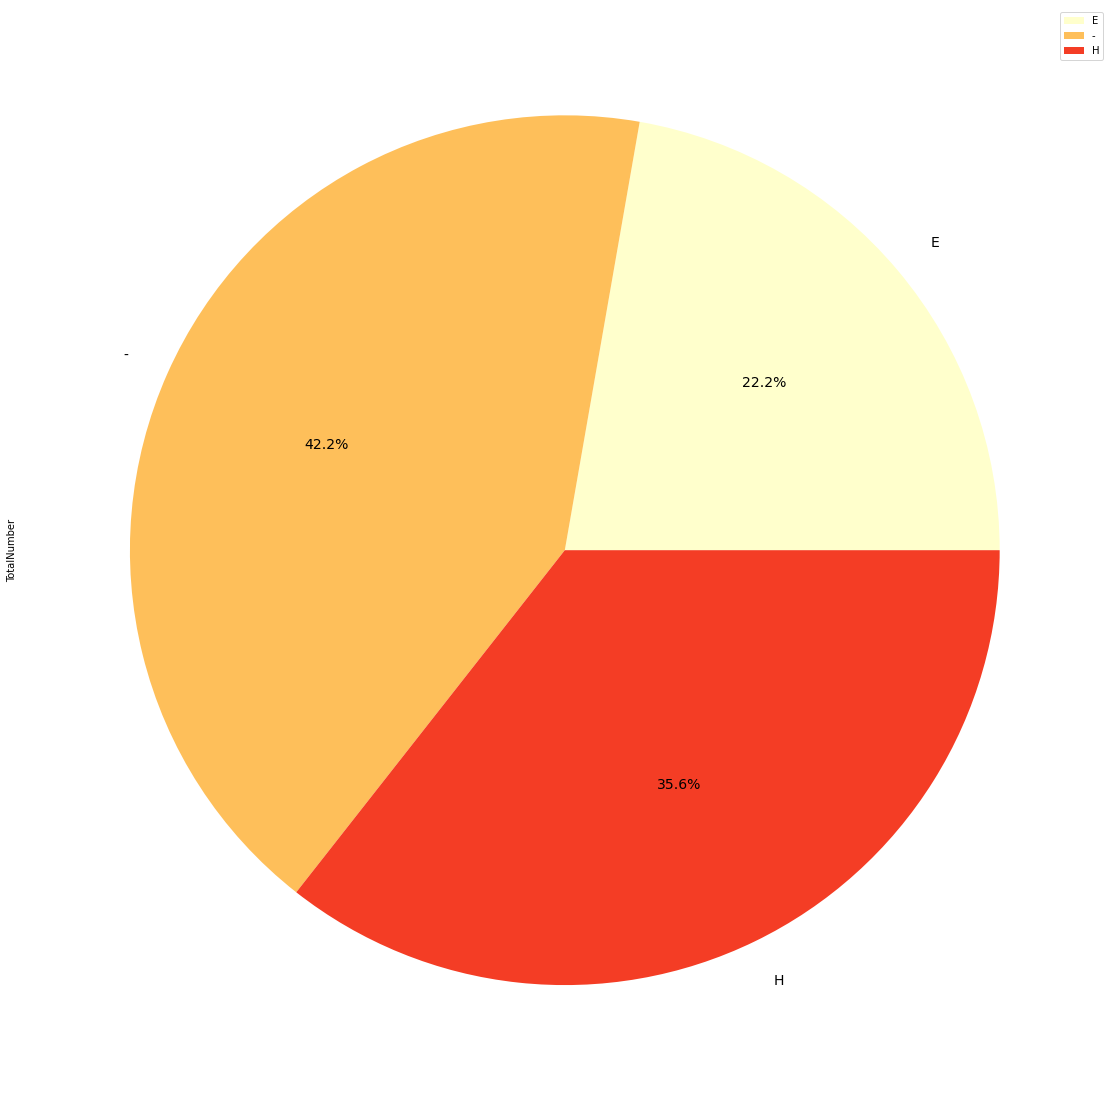

In [ ]:
plt.figure(figsize=(25,15))
cmap = plt.get_cmap("YlOrRd")
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
ss_comp.plot.pie(y="TotalNumber", autopct='%1.1f%%', figsize=(20, 20), fontsize=14, colors=colors )

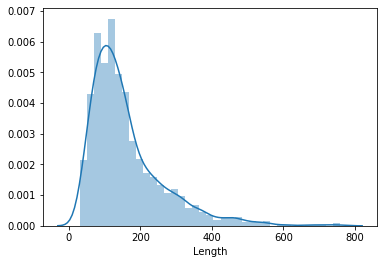

In [ ]:
sns.distplot(df["Length"])